In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import autorootcwd
from tqdm import tqdm

import torch
import pandas as pd
import matplotlib.pyplot as plt 

from src.utils import chord_to_id_map, id_to_chord_map
from src.data.dataset import FullChordDataset
from src.utils import get_filenames, get_raw_chord_annotation, chord_to_id, get_chord_quality, get_chord_root

# Distributions over Quality/Root

In [3]:
dataset = FullChordDataset()

all_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_labels.extend(labels)

all_labels = [label.item() for label in all_labels]
all_labels_chords = [id_to_chord_map[label] for label in all_labels]
all_labels_series = pd.Series(all_labels_chords)

Using all filenames!


  0%|          | 0/1213 [00:00<?, ?it/s]/Users/pierrelardet/.pyenv/versions/UG4Diss/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
  0%|          | 0/1213 [00:00<?, ?it/s]


FileNotFoundError: Generative features not found for blessidunionofsouls_ibelieve. Please run the generative feature extraction script.

In [ ]:
qualities = [get_chord_quality(label) for label in all_labels]
qualities = pd.Series(qualities)

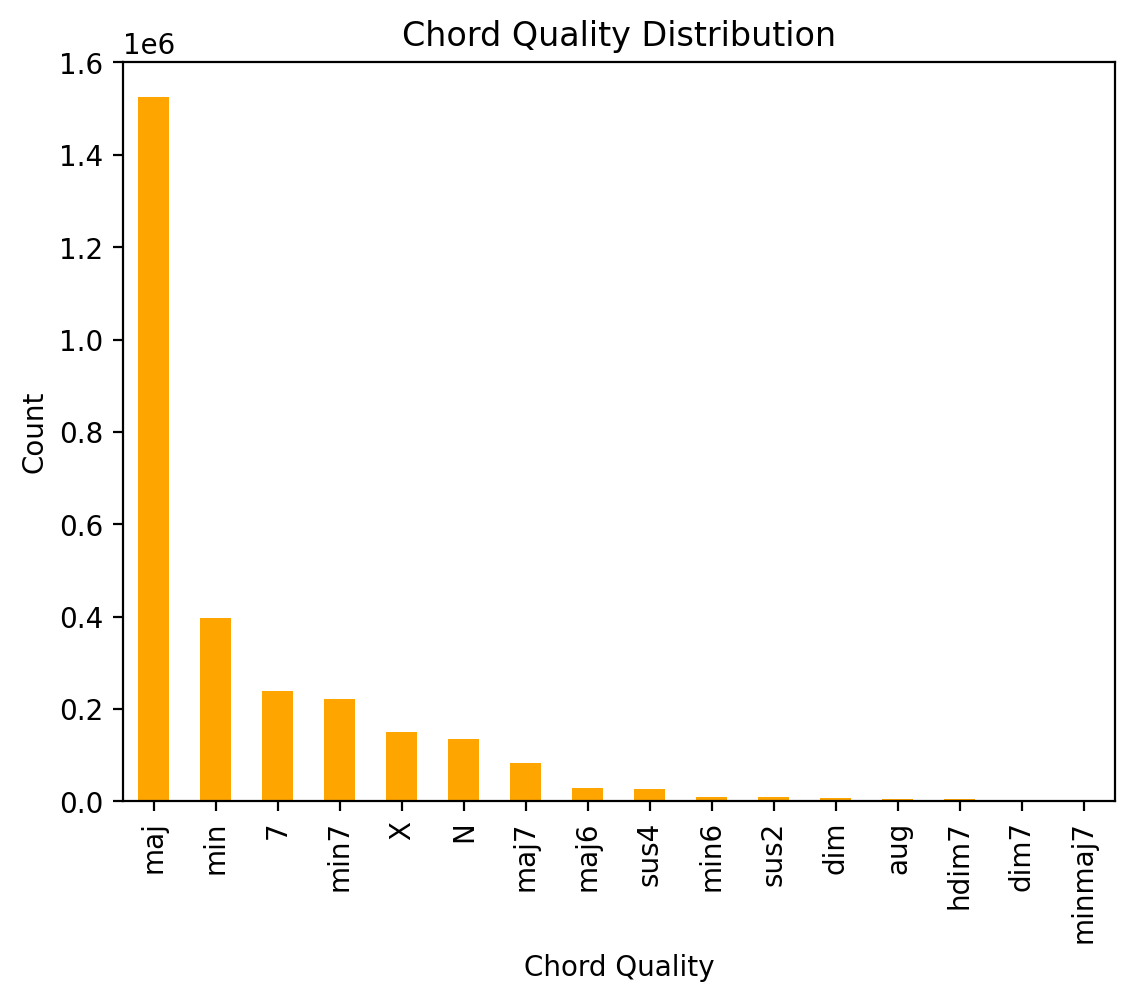

In [ ]:
# Print label histogram
fig, ax = plt.subplots()
qualities.value_counts().plot(kind='bar', ax=ax, color='orange')
plt.title('Chord Quality Distribution')
plt.xlabel('Chord Quality')
plt.ylabel('Count')
plt.show()

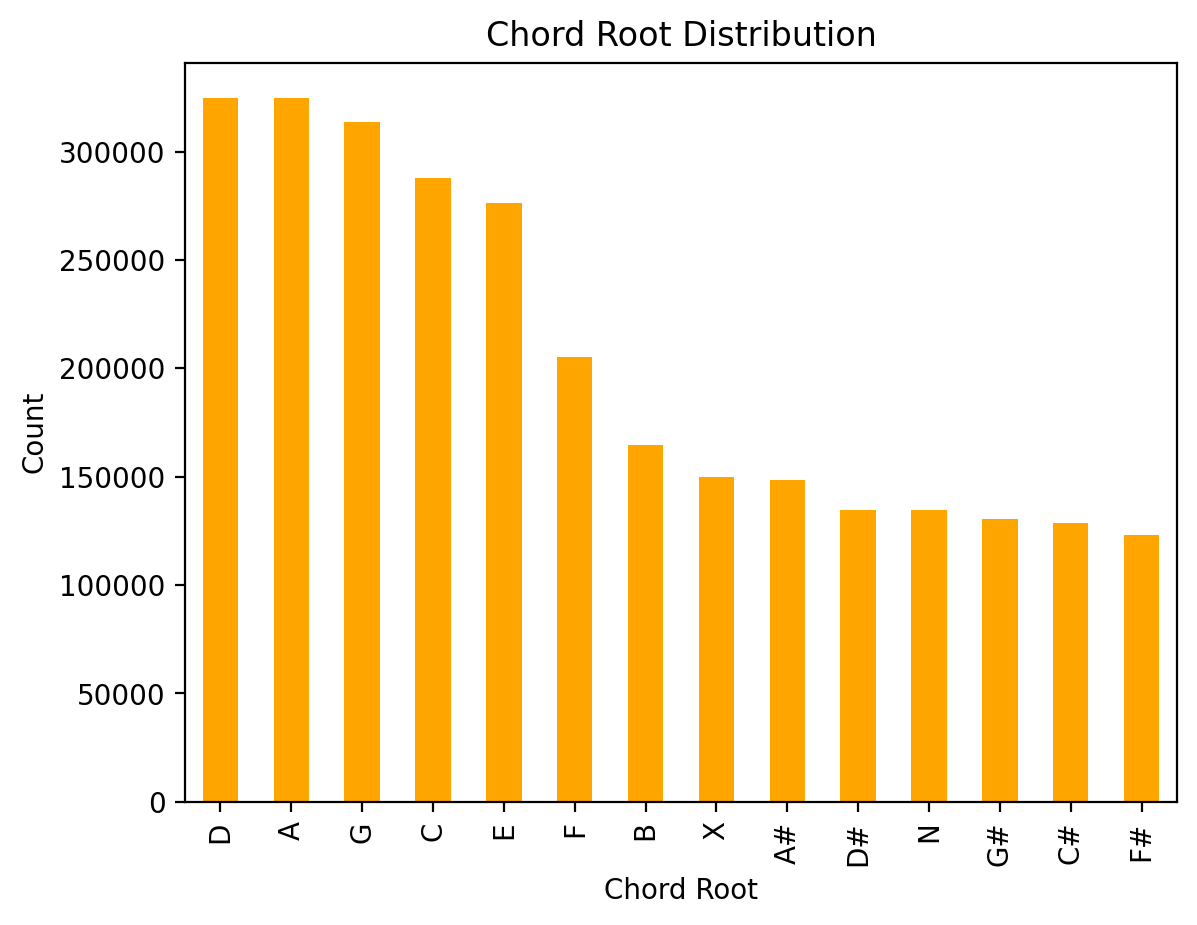

In [ ]:
roots = [get_chord_root(label) for label in all_labels]
roots = pd.Series(roots)
# Print label histogram
fig, ax = plt.subplots()
roots.value_counts().plot(kind='bar', ax=ax, color='orange')
plt.title('Chord Root Distribution')
plt.xlabel('Chord Root')
plt.ylabel('Count')
plt.show()

In [12]:
chord_counts = {}
chord_durations = {}

filenames = get_filenames()
for filename in tqdm(filenames):
    chords = get_raw_chord_annotation(filename)
    for chord in chords:
        chord_id = chord_to_id(chord.value)
        chord_counts[chord_id] = chord_counts.get(chord_id, 0) + 1
        chord_durations[chord_id] = chord_durations.get(chord_id, 0) + chord.duration

# Rename ids to chords
chord_counts = {id_to_chord_map[k]: v for k, v in chord_counts.items()}
chord_counts = pd.Series(chord_counts).sort_values(ascending=False)
chord_durations = {id_to_chord_map[k]: v for k, v in chord_durations.items()}
chord_durations = pd.Series(chord_durations).sort_values(ascending=False)

100%|██████████| 1213/1213 [00:12<00:00, 94.09it/s] 


In [13]:
# Convert to quality-based
quality_counts = {}
quality_durations = {}
for chord, count in chord_counts.items():
    quality = get_chord_quality(chord_to_id_map[chord])
    quality_counts[quality] = quality_counts.get(quality, 0) + count
    quality_durations[quality] = quality_durations.get(quality, 0) + chord_durations[chord]

quality_counts = pd.Series(quality_counts).sort_values(ascending=False)
quality_durations = pd.Series(quality_durations).sort_values(ascending=False)

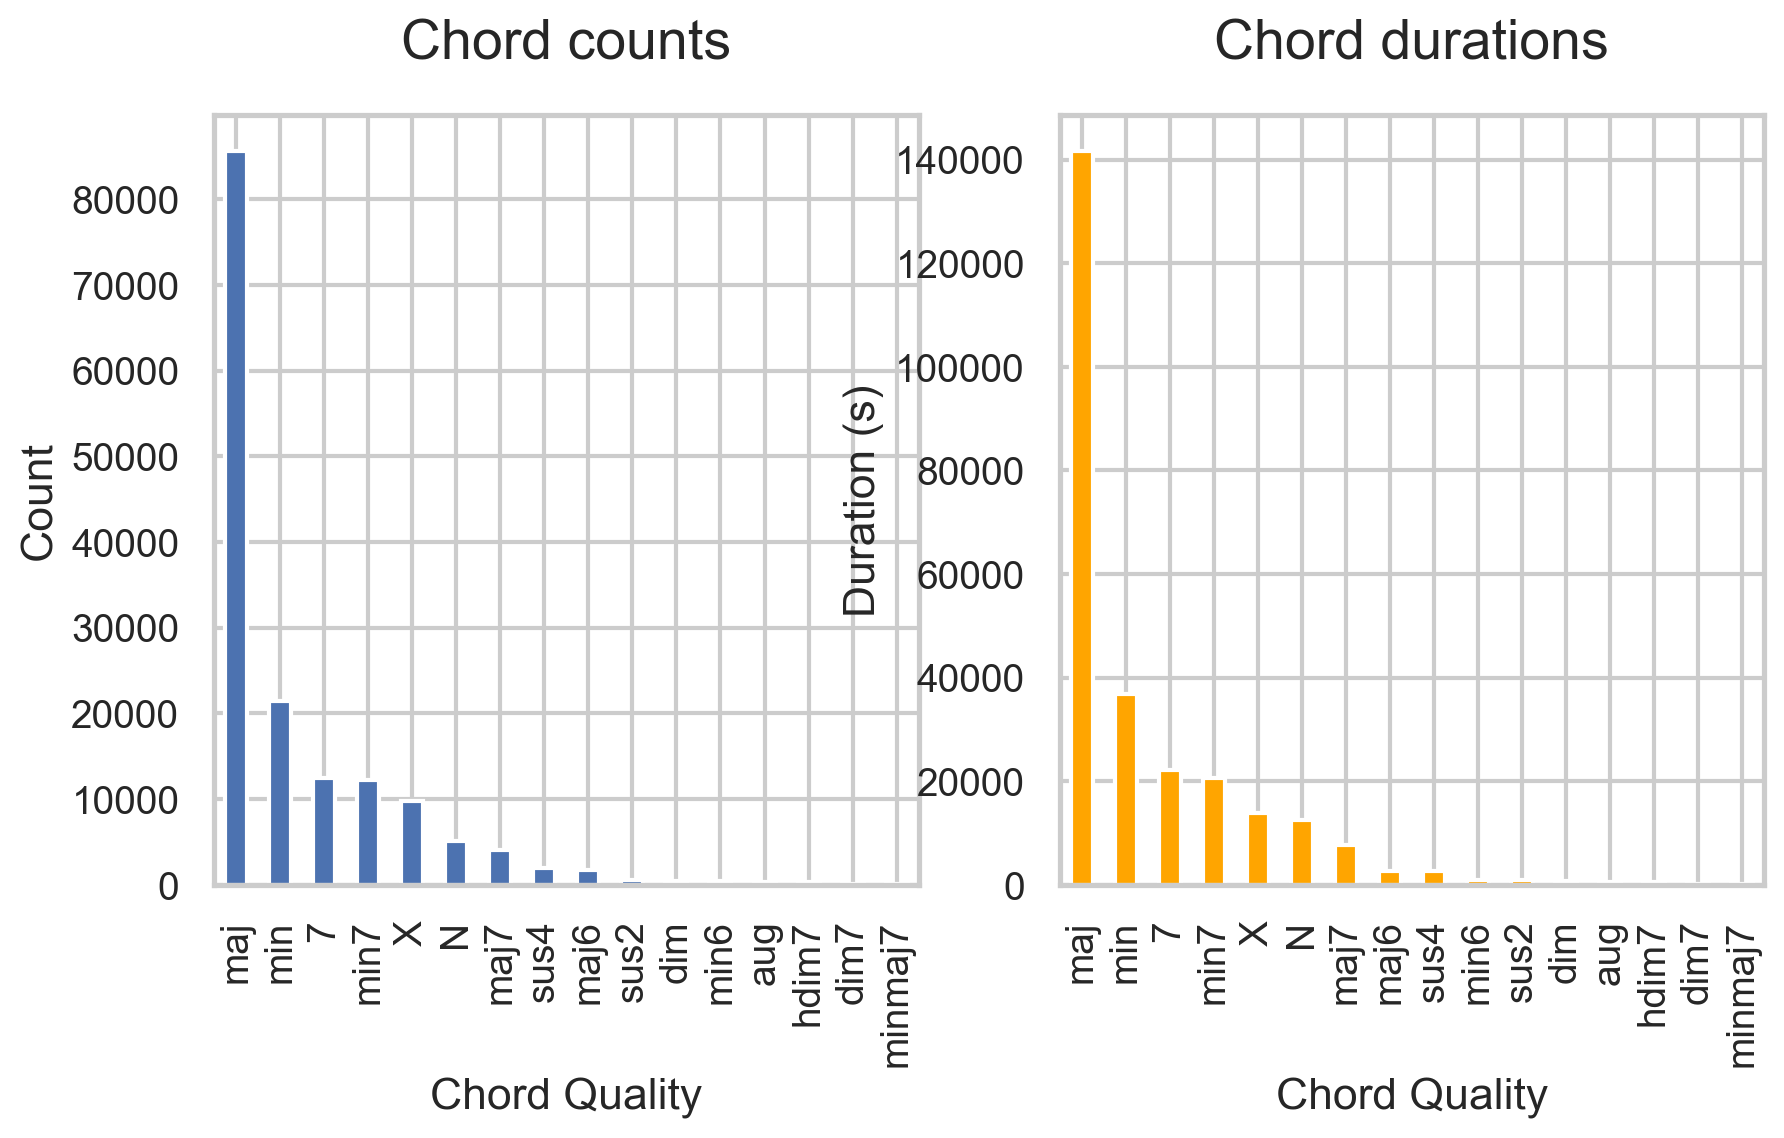

In [14]:
# Plot chord counts and durations
fig, ax = plt.subplots(1,2, figsize=(10, 5))
quality_counts.plot(kind='bar', ax=ax[0], title='Chord counts')
quality_durations.plot(kind='bar', ax=ax[1], color='orange', title='Chord durations')
ax[0].set_ylabel('Count')
ax[1].set_ylabel('Duration (s)')
ax[0].set_xlabel('Chord Quality')
ax[1].set_xlabel('Chord Quality')
plt.show()

In [15]:
# Convert to quality-based
root_counts = {}
root_durations = {}
for chord, count in chord_counts.items():
    root = get_chord_root(chord_to_id_map[chord])
    root_counts[root] = root_counts.get(root, 0) + count
    root_durations[root] = root_durations.get(root, 0) + chord_durations[chord]

root_counts = pd.Series(root_counts).sort_values(ascending=False)
root_durations = pd.Series(root_durations).sort_values(ascending=False)

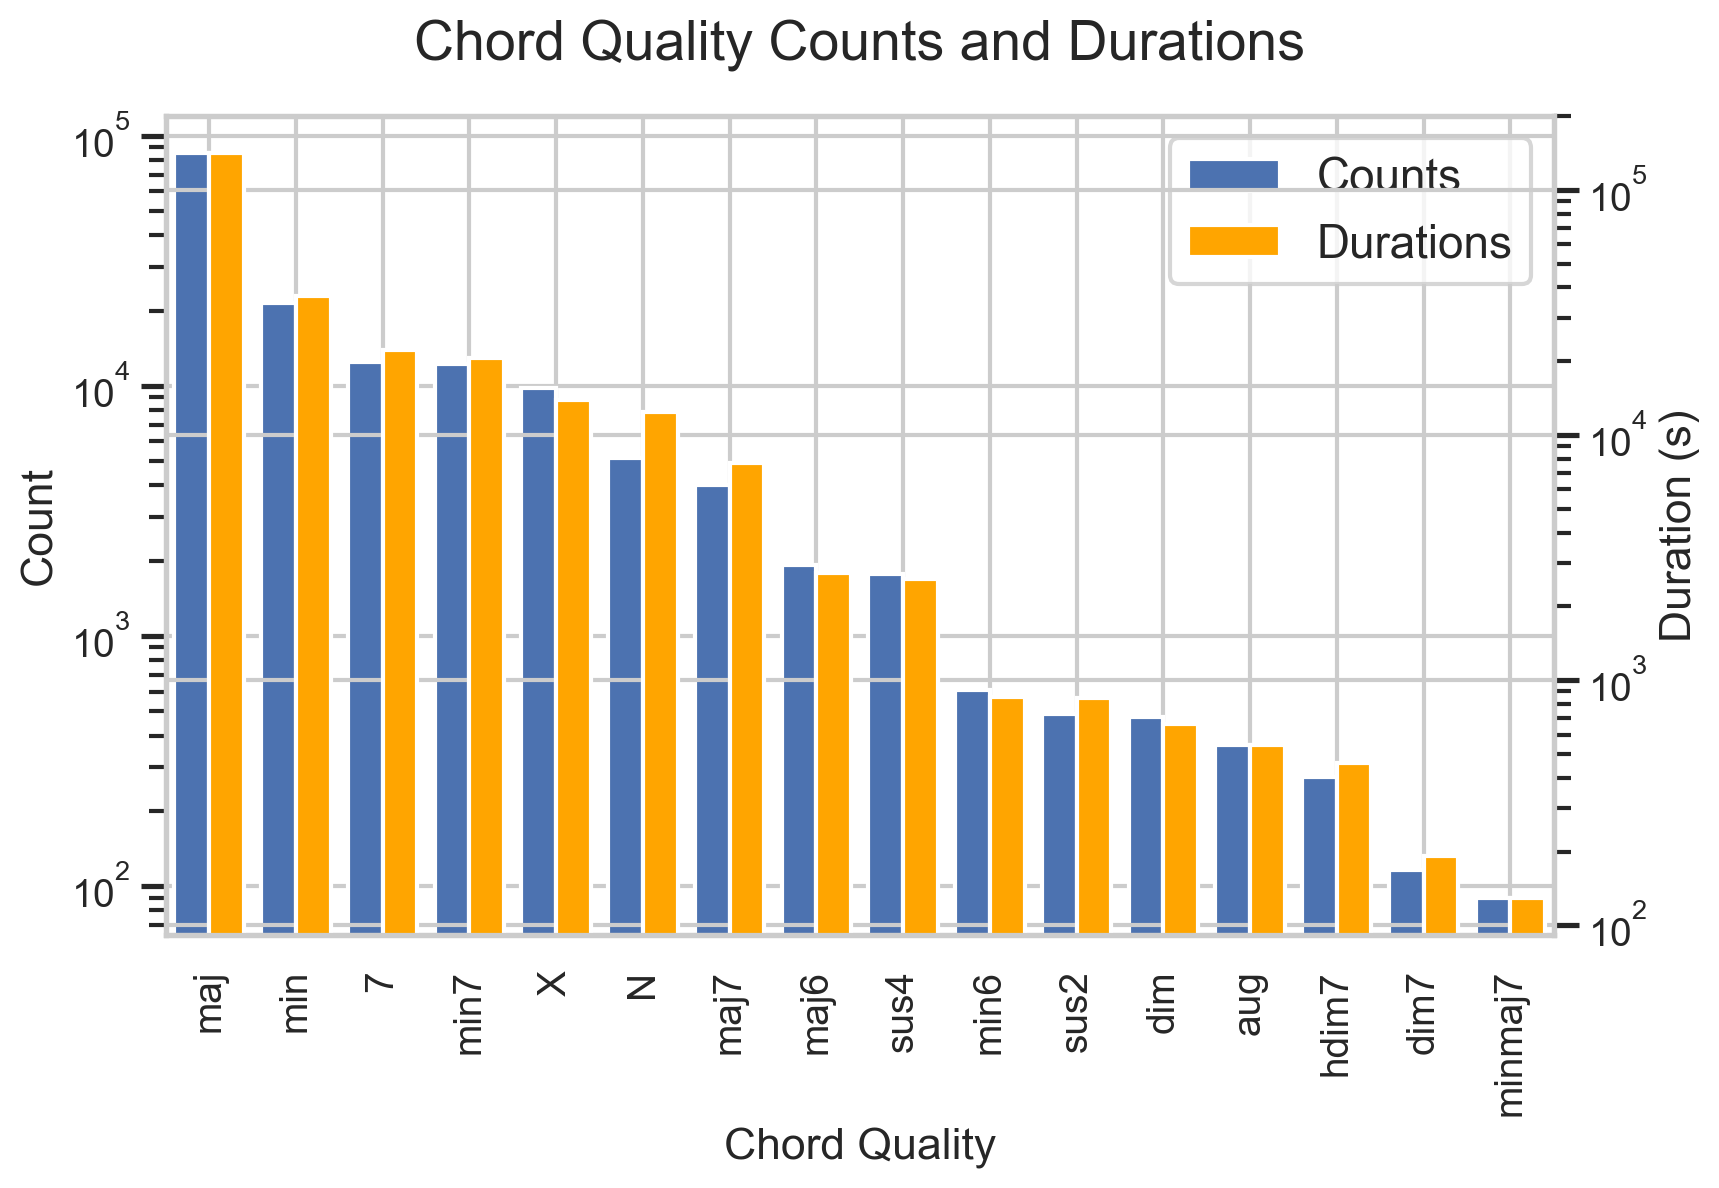

In [16]:
# Plot chord counts and durations
fig, ax1 = plt.subplots(figsize=(8, 5))
plt.tight_layout()

ax2 = ax1.twinx()
width = 0.4

quality_counts.plot(kind='bar', ax=ax1, width=width, position=1, label='Counts')
quality_durations.plot(kind='bar', ax=ax2, width=width, position=0, color='orange', label='Durations')

ax1.set_ylabel('Count')
ax2.set_ylabel('Duration (s)')
ax1.set_xlabel('Chord Quality')

# Adjust the x-axis limits to avoid cutting off the leftmost bar
ax1.set_xlim(-0.5, len(quality_counts) - 0.5)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Make it log scale y
ax1.set_yscale('log')
ax2.set_yscale('log')

# plt.savefig('thesis/figures/chord_quality_counts_durations.png', dpi=100, bbox_inches='tight')
plt.title('Chord Quality Counts and Durations')
plt.show()
# fig, ax = plt.subplots(1,2, figsize=(10, 5))
# root_counts.plot(kind='bar', ax=ax[0], title='Chord counts')
# root_durations.plot(kind='bar', ax=ax[1], color='orange', title='Chord durations')
# ax[0].set_ylabel('Count')
# ax[1].set_ylabel('Duration (s)')
# ax[0].set_xlabel('Chord Root')
# ax[1].set_xlabel('Chord Root')
# plt.show()

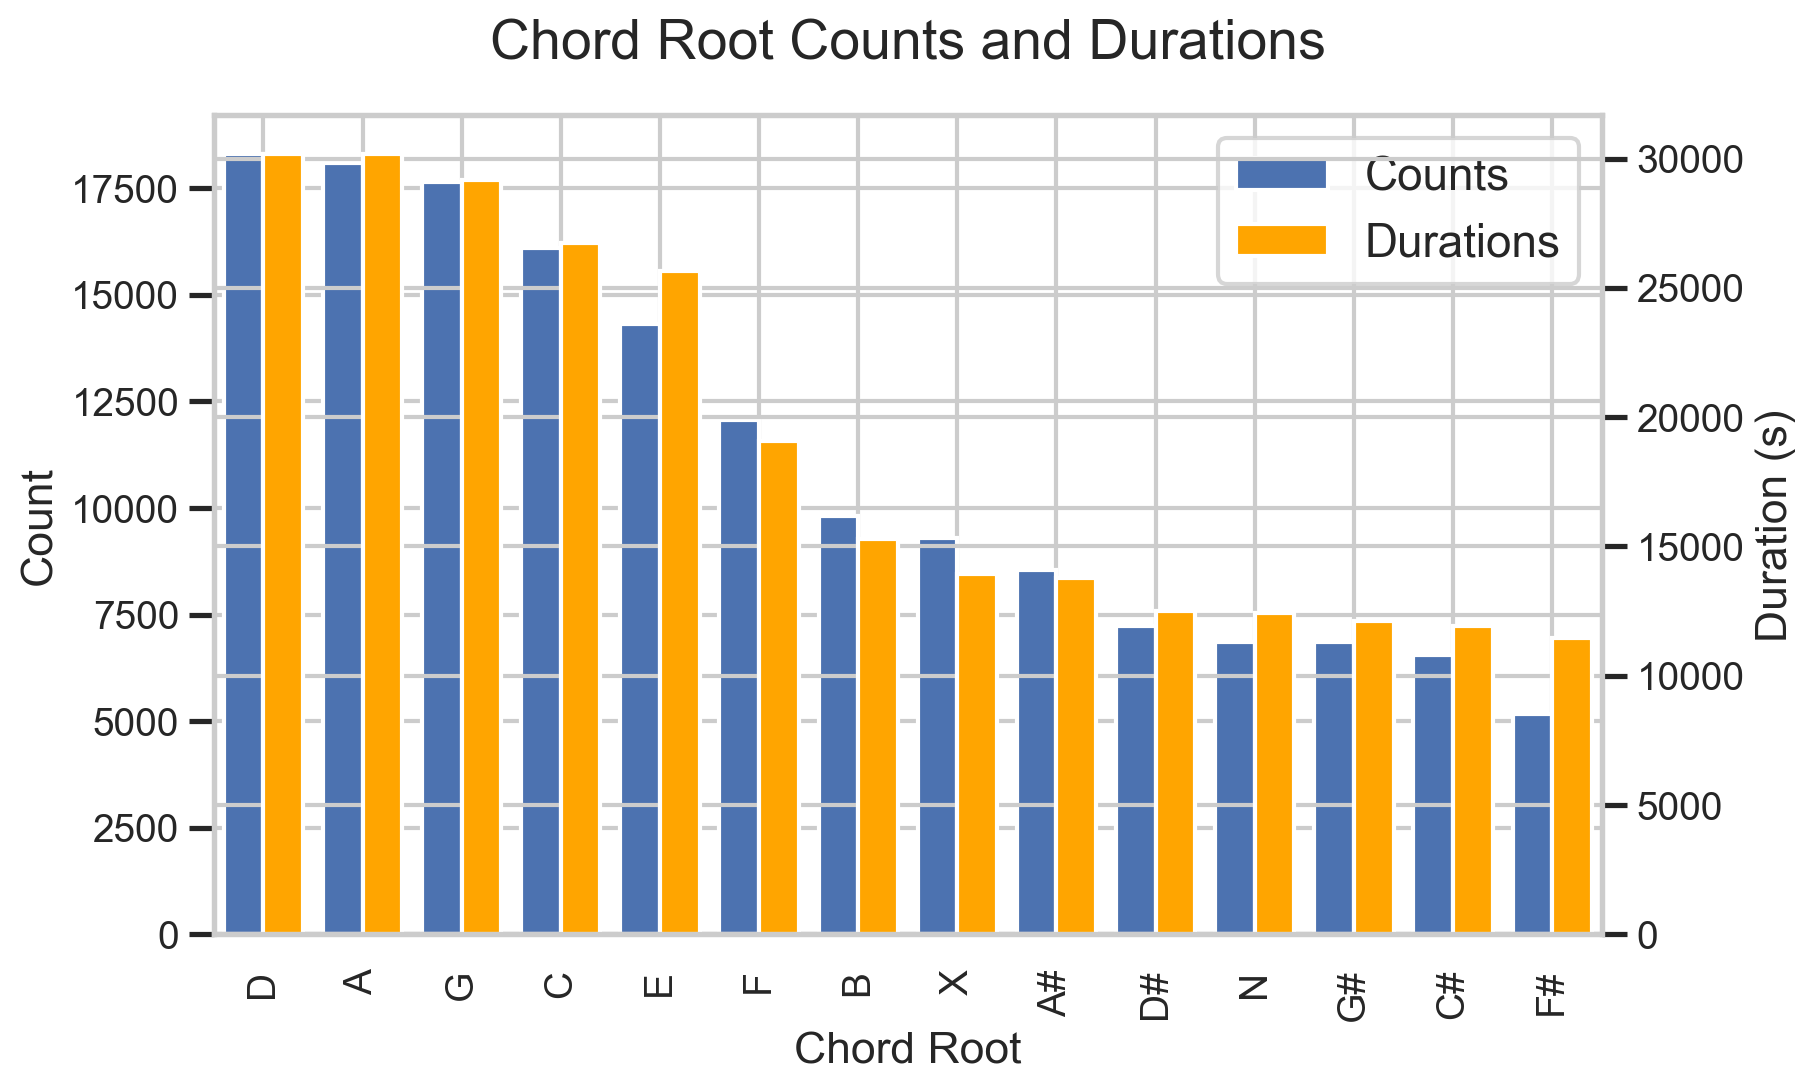

In [17]:
# Plot root counts and durations
fig, ax1 = plt.subplots(figsize=(8, 5))
plt.tight_layout()

ax2 = ax1.twinx()
width = 0.4

root_counts.plot(kind='bar', ax=ax1, width=width, position=1, label='Counts')
root_durations.plot(kind='bar', ax=ax2, width=width, position=0, color='orange', label='Durations')

ax1.set_ylabel('Count')
ax2.set_ylabel('Duration (s)')
ax1.set_xlabel('Chord Root')

# Adjust the x-axis limits to avoid cutting off the leftmost bar
ax1.set_xlim(-0.5, len(root_counts) - 0.5)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# plt.savefig('thesis/figures/root_counts_durations.png', dpi=100, bbox_inches='tight')
plt.title('Chord Root Counts and Durations')
plt.show()

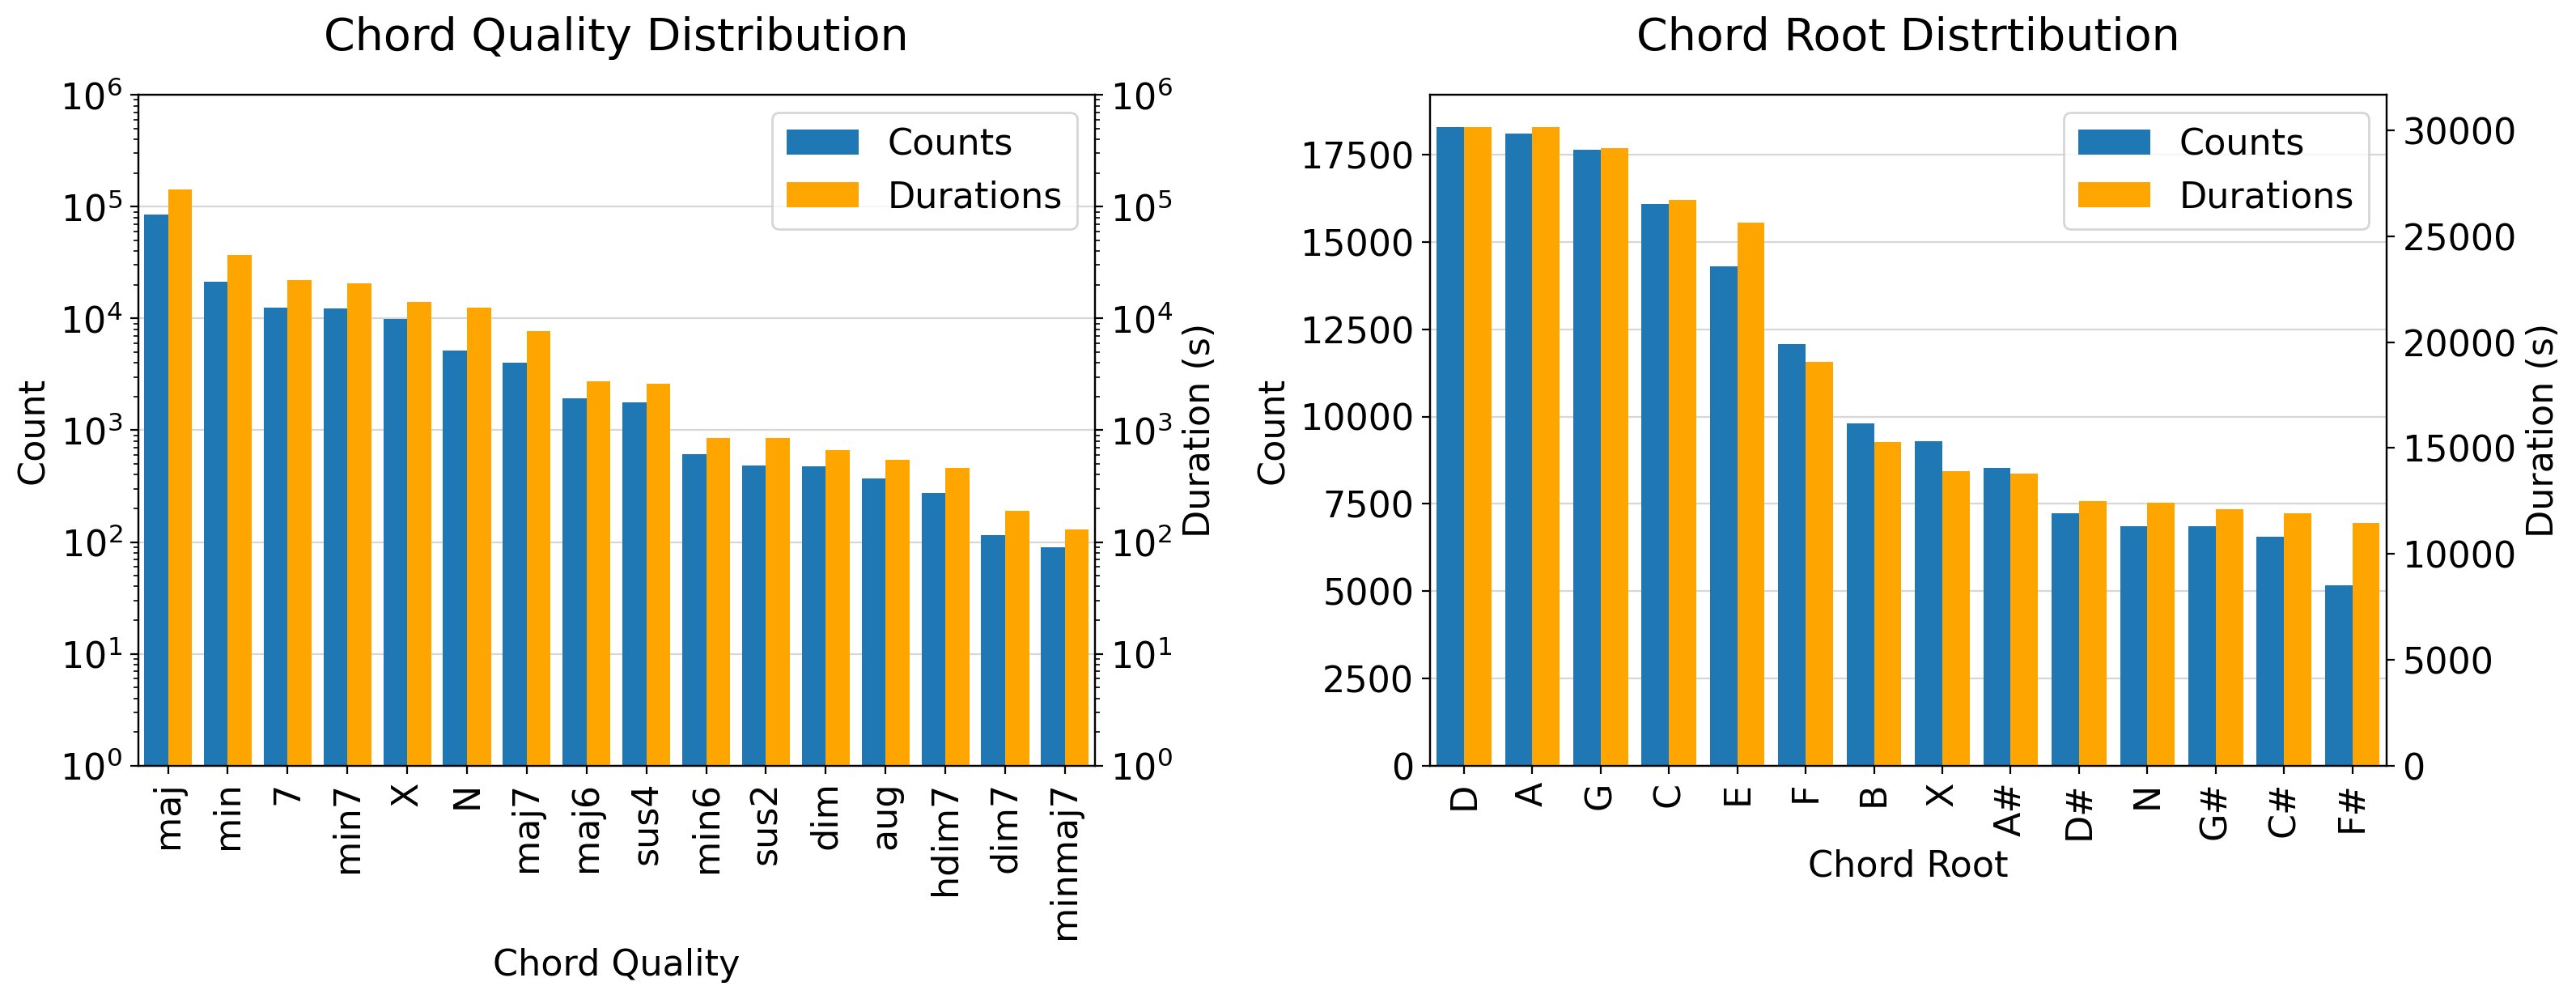

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.style.use('default')
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'axes.titlesize': 20, 'xtick.labelsize': 16, 'ytick.labelsize': 16})
# Remove sns styling
plt.rcParams.update({'axes.titlesize': 20, 'axes.labelsize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16})
# Increase distance from title to plot
plt.rcParams.update({'axes.titlepad': 20})

# Plot chord quality counts and durations
ax1_2 = ax1.twinx()
quality_counts.plot(kind='bar', ax=ax1, width=width, position=1, label='Counts')
quality_durations.plot(kind='bar', ax=ax1_2, width=width, position=0, color='orange', label='Durations')

ax1.set_ylabel('Count')
ax1_2.set_ylabel('Duration (s)')
ax1.set_xlabel('Chord Quality')
ax1.set_title('Chord Quality Distribution')

# Adjust the x-axis limits to avoid cutting off the leftmost bar
ax1.set_xlim(-0.5, len(quality_counts) - 0.5)

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')

# Make it log scale y
ax1.set_yscale('log')
ax1_2.set_yscale('log')

# Plot chord root counts and durations
ax2_2 = ax2.twinx()
root_counts.plot(kind='bar', ax=ax2, width=width, position=1, label='Counts')
root_durations.plot(kind='bar', ax=ax2_2, width=width, position=0, color='orange', label='Durations')

ax2.set_ylabel('Count')
ax2_2.set_ylabel('Duration (s)')
ax2.set_xlabel('Chord Root')
ax2.set_title('Chord Root Distrtibution')

# Adjust the x-axis limits to avoid cutting off the leftmost bar
ax2.set_xlim(-0.5, len(root_counts) - 0.5)

lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

# Make it log scale y

# Add gridlines
ax1.grid(axis='y', linestyle='-', alpha=0.5)
ax2.grid(axis='y', linestyle='-', alpha=0.5)

# Make gridlines go behind the bars
ax1.set_axisbelow(True)
ax1.set_ylim(1, 1e6)
ax1_2.set_axisbelow(True)
ax1_2.set_ylim(1, 1e6)

ax2.set_axisbelow(True)
ax2_2.set_axisbelow(True)


plt.savefig('thesis/figures/chord_distribution.png', dpi=100, bbox_inches='tight')
plt.show()

## Durations

In [4]:
# Mean chord duration over the dataset
# Regenerate the durations form the annotations
import numpy as np
from src.utils import get_filenames

filenames = get_filenames()

durations = []
for filename in tqdm(filenames):
    chords = get_raw_chord_annotation(filename)
    for chord in chords:
        durations.append(chord.duration)
# Convert to quality-based
durations = np.array(durations)
mean_duration = durations.mean()

100%|██████████| 1213/1213 [00:09<00:00, 123.50it/s]


In [5]:
mean_duration

1.6858631881961288

# What about the Xs?

In [78]:
dataset = FullChordDataset()
all_song_labels = []

for i in tqdm(range(len(dataset))):
    labels = dataset[i][1]
    all_song_labels.append(labels)

100%|██████████| 1213/1213 [00:05<00:00, 225.55it/s]


In [79]:
all_song_labels = [[label.item() for label in song] for song in all_song_labels]
all_song_chords = [[id_to_chord_map[label] for label in song] for song in all_song_labels]

In [94]:
idx = 100
pd.Series(all_song_chords[idx]).value_counts()

A#:maj     557
C:7        236
F:7        236
D#:7       166
F:maj      106
G:maj      105
N          104
D#:maj     104
D:7         53
A#:7        53
C:maj       53
G:min       52
E:hdim7     52
X           52
Name: count, dtype: int64

In [95]:
# Find ALL index of X chord in song idx
all_song_chords[idx].index('X')

331

In [96]:
all_song_chords[idx][300:350]

['G:min',
 'G:min',
 'G:min',
 'G:min',
 'G:min',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'A#:7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'E:hdim7',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'X',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj',
 'A#:maj']

In [20]:
dataset.get_filename(60)

'donmclean_vincent(starry,starrynight)'

In [98]:
from src.utils import get_raw_chord_annotation

chords = get_raw_chord_annotation(dataset.get_filename(idx))
list([chord.value for chord in chords])

['N',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'F:maj',
 'Eb:maj',
 'F:maj',
 'Bb:maj',
 'G:maj',
 'C:maj',
 'G:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'Eb:maj/5',
 'Bb:maj',
 'C:7',
 'F:7',
 'Bb:maj',
 'D:7/5',
 'G:min',
 'Bb:7/5',
 'E:hdim7',
 'F:sus4(b7)',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Bb:maj',
 'Eb:7/5',
 'Eb:7/5',
 'F:maj',
 'Eb:maj',
 'F:maj',
 'Bb:maj',
 'G:maj',
 'C:ma

In [123]:
from src.utils import chord_to_id, get_pitch_classes
from harte.harte import Harte
chord_str = 'D:7(7)'
chord = Harte(chord_str)
print(chord_to_id(chord_str))
print(chord.pitchClasses)
print(chord.quality)
get_pitch_classes(chord_str)

30
[2, 6, 9, 0, 1]
major


(0, 4, 7, 10, 11)